In [16]:
import pandas as pd
import regex as re
import numpy as np
import copy
import spacy
from spacy.tokens import Doc
from spacy.attrs import LOWER, POS, ENT_TYPE, IS_ALPHA
from spacy.matcher import Matcher
from spacy.util import filter_spans
import re
import matplotlib.pyplot as plt
from collections import Counter
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from matplotlib.patches import Patch

from DocumentWorking import Document
import sys, importlib

nlp = spacy.load("en_core_web_lg")


/home/blitt/.local/lib/python3.8/site-packages/spacy/util.py:837: UserWarning: [W095] Model 'en_core_web_lg' (3.2.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [2]:
#load in Document and nlp modules/objects
from DocumentWorking import Document
import sys, importlib
importlib.reload(sys.modules['DocumentWorking'])

doc = Document("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/AG2PISlides.csv", nlp)

In [20]:
#just wanting to see if we can get vectors 
#[item.vector for item in doc.workingDoc]

def getSpans(spaCyDoc): 
    #now we want to get spans on punctuation 
    spanList = []
    spanStart = 0 
    spanEnd = 0
    for token in spaCyDoc: 
        if token.is_punct: 
            currSpan = spaCyDoc[spanStart:spanEnd]
            spanList.append(currSpan)
            spanStart = spanEnd + 1
        spanEnd += 1
    return spanList

#get spans using stock spacy sentance/span level vectors 
#it doesn't seem that adding all span vectors together works very well 
def getSentSimList(spanList): 
    #spanList is now the object of interest
    #add this as an attribute of the Document object eventually 
    #create nested list as similarity matrix 
    spanSim = []
    for span1 in spanList: 
        currSims = []
        for span2 in spanList: 
            currSims.append(span1.similarity(span2))
        #print(len(currSims))
        spanSim.append(currSims)

    return spanSim

In [5]:
#NOTES: can't have .... because how do we know if those seperate a sentance or not..? Could change this 
#NOTES: slashes should be changed so that there is a space inbetween them 

#This looks pretty good!
#run some quick tests to see how well the similarity comparison worked
"""
for i in range(0, len(spanList)): 
    mainSpan = spanList[i]
    scoreList = spanSim[i]
    #remove the identity match at location [i,i] from 
    #also remove identity match in span list so we have accurate indexing
    cleanList = scoreList[0:i] + scoreList[i+1:len(scoreList)+1]
    cleanSpans = spanList[0:i] + spanList[i+1:len(spanList)+1]
    print(mainSpan)
    indexOfMatch = cleanList.index(max(cleanList))
    print(cleanSpans[indexOfMatch])
    print("---------------------------\n")
    #print(scoreList.index(max(scoreList)))
    #print(scoreList.index(max()))
"""

'\nfor i in range(0, len(spanList)): \n    mainSpan = spanList[i]\n    scoreList = spanSim[i]\n    #remove the identity match at location [i,i] from \n    #also remove identity match in span list so we have accurate indexing\n    cleanList = scoreList[0:i] + scoreList[i+1:len(scoreList)+1]\n    cleanSpans = spanList[0:i] + spanList[i+1:len(spanList)+1]\n    print(mainSpan)\n    indexOfMatch = cleanList.index(max(cleanList))\n    print(cleanSpans[indexOfMatch])\n    print("---------------------------\n")\n    #print(scoreList.index(max(scoreList)))\n    #print(scoreList.index(max()))\n'

In [6]:
#we should seperate by the question, because that will give a more natural grouping of the words we care about
doc = Document("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/AG2PISlides.csv", nlp, subsetColumns=["Touchpoint"])


In [7]:
doc.getColSubAttributeDict("Touchpoint", "workingDoc").keys()

#subset a single dictionary, this one is a particular question in the touchpoint column 
discoverDict = doc.getColSubAttributeDict("Touchpoint", "workingDoc")['How do they first discover the existence of AG2PI & what are they looking for?']
spanList = getSpans(discoverDict)
sims = getSimList(spanList)


<ipython-input-3-e33ddf64d98a>:25: UserWarning: [W008] Evaluating Span.similarity based on empty vectors.
  currSims.append(span1.similarity(span2))


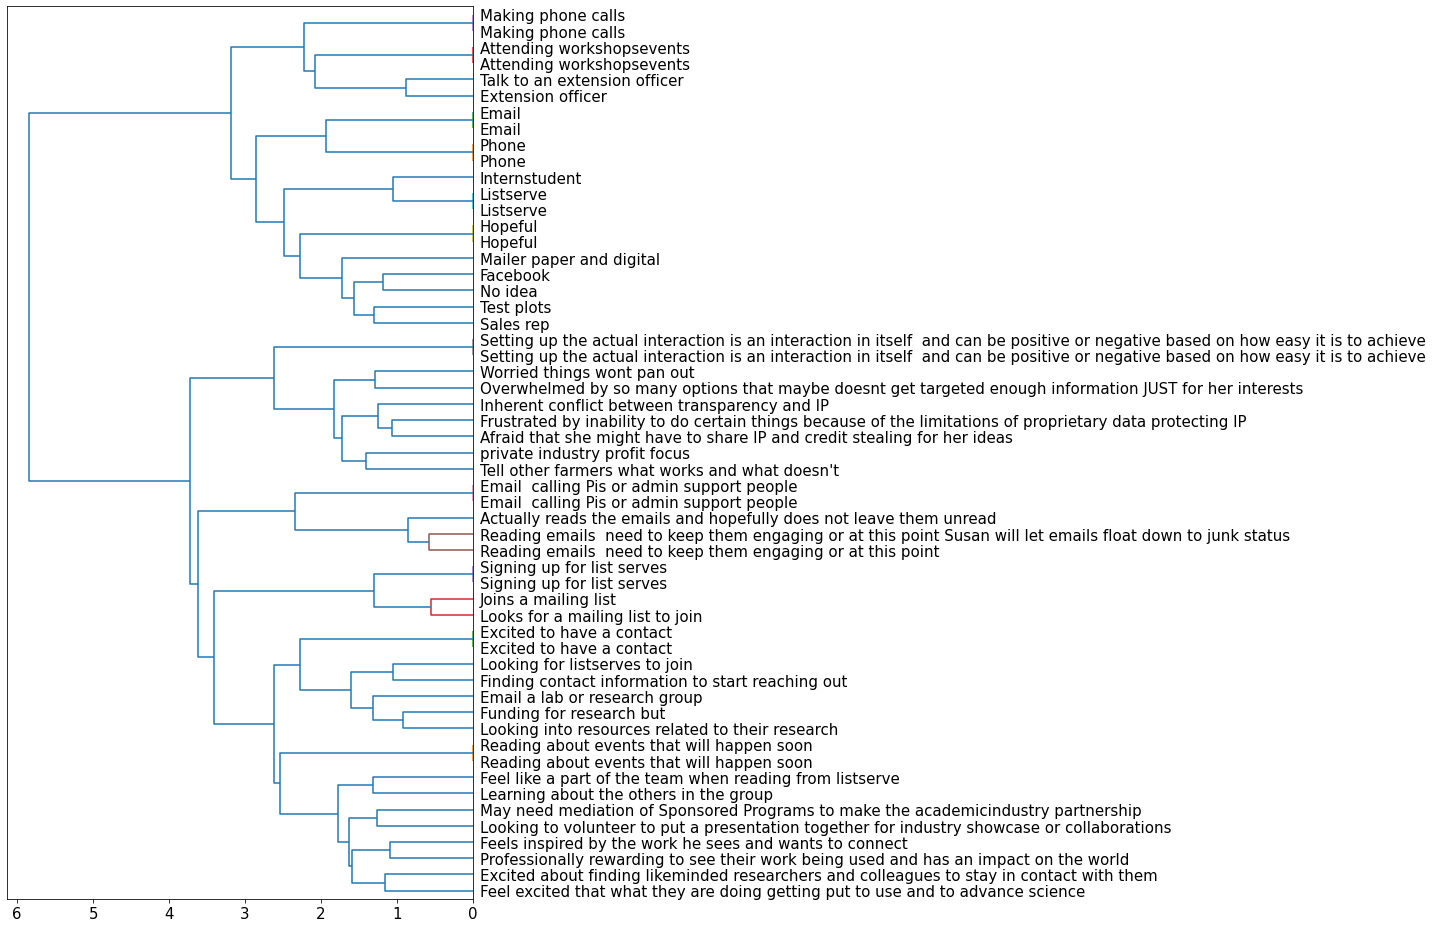

In [17]:
#take a stab at actually doing the linkage part 
#get item similarity using sentance vectors (adding all individual vectors together)
sim = np.array(sims)
linked = linkage(sim, 'ward')

labelList = [str(span) for span in spanList]
plt.figure(figsize=(20, 13))
dendrogram(linked,
            orientation='left',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True, color_threshold=.7)
plt.tick_params("y", labelsize=15)
plt.tick_params("x", labelsize=15)
plt.tight_layout()
plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/dendogramSmall.jpg")
#plt.tick_params("x", labelsize=20)

In [35]:
#try using sentance vectors from Googles sentance vector approach 
nlp = spacy.load('en_use_md')

#we should seperate by the question, because that will give a more natural grouping of the words we care about
doc = Document("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/AG2PISlides.csv", nlp, subsetColumns=[["Touchpoint", "Persona"],"Touchpoint", "Persona"])

#subset a single dictionary, this one is a particular question in the touchpoint column 
discoverDict = doc.getColSubAttributeDict("Touchpoint", "workingDoc")['How do they stay in contact with AG2PI ']
spanList = getSpans(discoverDict)
sims = getSimList(spanList)

/home/blitt/.local/lib/python3.8/site-packages/spacy/util.py:837: UserWarning: [W095] Model 'en_use_md' (0.4.3) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [34]:
doc.getColSubAttributeDict("Touchpoint", "workingDoc").keys()

dict_keys(['How do they first discover the existence of AG2PI & what are they looking for?', 'How do they stay in contact with AG2PI ', 'How do they get information from AG2PI & learn of new activities or opportunities ', 'How can they share their expertise with AG2PI ', 'What is defined as a successful interaction ', 'How can they share information with/to AG2PI '])

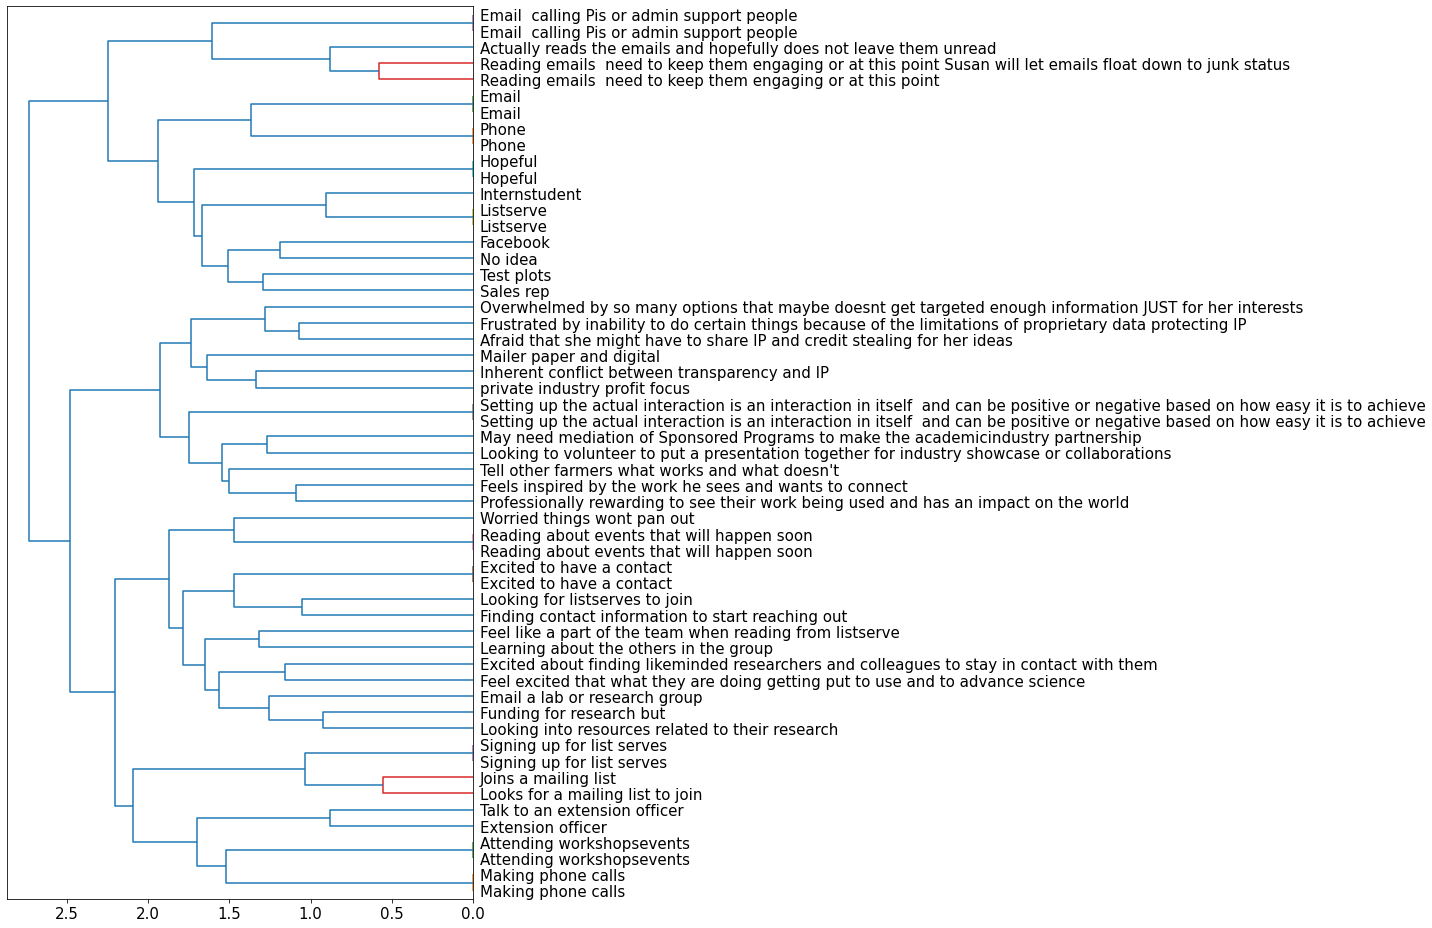

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

#take a stab at actually doing the linkage part 
sim = np.array(sims)
linked = linkage(sim, 'complete')

labelList = [str(span) for span in spanList]
plt.figure(figsize=(20, 13))
dendrogram(linked,
            orientation='left',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True, color_threshold=.7)
plt.tick_params("y", labelsize=15)
plt.tick_params("x", labelsize=15)
plt.tight_layout()
plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/dendogramSentVecs.jpg")

#plt.tick_params("x", labelsize=20)
#TODO: for tomorrow, make one of these but COLOR it by the PERSON in play!

In [ ]:

"""
'Formula' for creating custom legends
-------------------------------------------------
legendElements = []
legendElements.insert(0, Patch(facecolor=currColor,label=keyName))
plt.legend(handles=legendElements,loc='best')
"""

In [36]:
#COMPLETE EXAMPLE USING  GOOGLE SENT EMBEDDINGS AND COLORING
"""
Subset list is one of the lists from subsetColumns given when initializing the Document object. 
It specifies first what information we will be taking a slice of to create the tree, and 
what information will be used to color the tree. 

cleaningLevel is the level of information that we want to take. Right now we should always use "workingDoc",
since we need actual spaCy documents to get spans and calculate span similarity. 

simFunction. This is a function that will take a list of spans and give us the similarity between them. 

Key is the "slice" to take. 


For example, we could have: 
key = 'How do they first discover the existence of AG2PI & what are they looking for?'
clusterSentEmbeddings(["Touchpoint", "Persona"], "workingDoc", key)

which would take answers to the question "How do they first discover the existence of AG2PI & what are they looking for"
colored by Persona, using text from the workingDoc text created during the automatic cleaning of the data
that occurs when creating Document. 
"""

def clusterSentEmbeddings(subsetList, cleaningLevel, simFunction, inKey, ax=None): 
    #example 
    #personaDict = doc.getDoubleColSubAttributeDict(["Touchpoint", "Persona"], "workingDoc")
    #inKey = 'How do they first discover the existence of AG2PI & what are they looking for?'
    
    personaDict = doc.getDoubleColSubAttributeDict(subsetList, cleaningLevel)
    
    """
    recreate the nested dictionary but get the spans instead of having the working doc
    this dictionary has touchpoints as the outer key and personas as the inner, so we can easily split by persona 
    for a particular toucpoint 
    """
    spanDict = {}
    for outerKey in personaDict.keys():
        spanDict[outerKey] = {}
        for innerKey in personaDict[outerKey].keys(): 
            spanDict[outerKey][innerKey] = getSpans(personaDict[outerKey][innerKey]) 

    #we most likely also only want to get dictionaries for one value of the touchpoint 
    keyDictSpans = spanDict[inKey]

    #now add spaces so there are technically no double spans in keyDict
    #use temporary dictionary to hold items while changing them 
    inSpans = {}

    #need to do deepcopy here
    keyDict = {}

    for key in keyDictSpans.keys(): 
        keyDict[key] = [None for item in range(0, len(keyDictSpans[key]))]
        for index, span in enumerate(keyDictSpans[key]): 
            spaceSpan = str(span)

            #add as many spaces to this span as needed so that there are no doubles, tripes
            #etc.. in our span list when we go to create plot/assign colors 
            while spaceSpan in inSpans: 
                spaceSpan += " "

            inSpans[spaceSpan] = True 

            #replace non-spaced version of span with space span 
            keyDict[key][index] = spaceSpan

    #get colors, map to keys in dictionary created above
    colorListFull = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#ffff33", "#a65628", "#f781bf", "#999999"]
    colorListFull = [item.upper() for item in colorListFull]
    colorKeyMapping = dict(zip(sorted(list(keyDict.keys())), colorListFull[:len(keyDict.keys())]))

    #make sure legend order matches with colors
    legendElements = []
    for index, key in enumerate(sorted(list(keyDict.keys()))):
        currColor = colorListFull[index]
        legendElements.insert(0, Patch(facecolor=currColor,label=key))

    #map each span to the color associated with its key in keyDict
    #this way we can easily grab the color for any span when plotting 
    colorSpanMapping = {
        str(span):colorKeyMapping[key]
        for key, val in keyDict.items()
        for span in val}

    #NOTE: we should be ok matching the spans to the strings because we sort the keys when we iterate 
    #and we maintain the order of items in the lists within keyDictSpans 
    #create list of all spans 
    spanList = []
    for k in sorted(list(keyDictSpans.keys())): 
        spanList += keyDictSpans[k]

    #create list of all string versions of spans (with spaces )
    labelList = []
    for k in sorted(list(keyDict.keys())): 
        labelList += keyDict[k]
    
    simList = simFunction(spanList)
    simList = np.array(simList)
    
    #get linkage 
    linked = linkage(simList, "complete")

    #COLORING 
    #black
    defaultColor = "#000000" 

    link_cols = {}

    #go through only the first two columns of the linkage matrix (which contain linkage information)
    #enumerate gives both an index (i) and the object in our data source (a 2d row of linkage)
    for i, i12 in enumerate(linked[:,:2].astype(int)):

        #for x in i12 iterates through nodes linked in this cluster
        #gets the color of either the nodes (if leaves) or subtrees (if not leaves i.e. x > len(Z)) being linked
        c1, c2 = (link_cols[x] if x > len(linked) else colorSpanMapping[labelList[x]] for x in i12) 

        #if the colors are the same, then make merged tree of c1 and c2 (located at i + 1 + len(Z)) have same color 
        #as the subtrees. IF NOT, simply use default color 
        #link_cols[i+1+len(linked)] = c1 if (c1 == c2 or i12[0] < len(linked) or i12[1] < len(linked)) else defaultColo
        link_cols[i+1+len(linked)] = c1 if (c1 == c2) else defaultColor

    #the link function is basically saying, what should I color the upside-down U part of the tree that 
    #links two subtrees 
    
    if ax is None: 
        ax = plt.gca()
        
    D = dendrogram(Z=linked, labels=labelList, orientation="left",color_threshold=None, link_color_func=lambda x: link_cols[x])
    
    print(colorSpanMapping)
    #note that the axis labels are text objects 
    for leaf in ax.yaxis.get_ticklabels():
        leaf.set_color(colorSpanMapping[leaf.get_text()])
    
    ax.legend(handles=legendElements,loc='upper left')
    #ax.set_title(inKey)
    print(inKey)
    return ax

{'Boring emails that get buried in lost': '#984EA3', 'Contacting faculty that are involved in their institution': '#984EA3', 'Happy to discover that there is a group focusing on what she is looking for': '#984EA3', 'Time conflict no easily accessible link to more information if you cant make the meeting': '#984EA3', 'Connections and contacts with other research faculty': '#984EA3', 'New ideas': '#984EA3', 'Website for AG2PI that is loaded with details': '#984EA3', 'Listserve email about events taking place': '#984EA3', 'Hope that someone somewhere has information and will Google it': '#984EA3', 'Finding Likeminded researchers': '#984EA3', 'Looking for funding': '#984EA3', 'Expanding on their topics of interest': '#984EA3', 'Answers to questions of How have others dealt with USDA': '#984EA3', 'Talk to coworkers about it': '#984EA3', 'Feel disappointed that she didnt know about it earlier': '#984EA3', 'Feels great that there is a place with her kind of researchers getting together regula

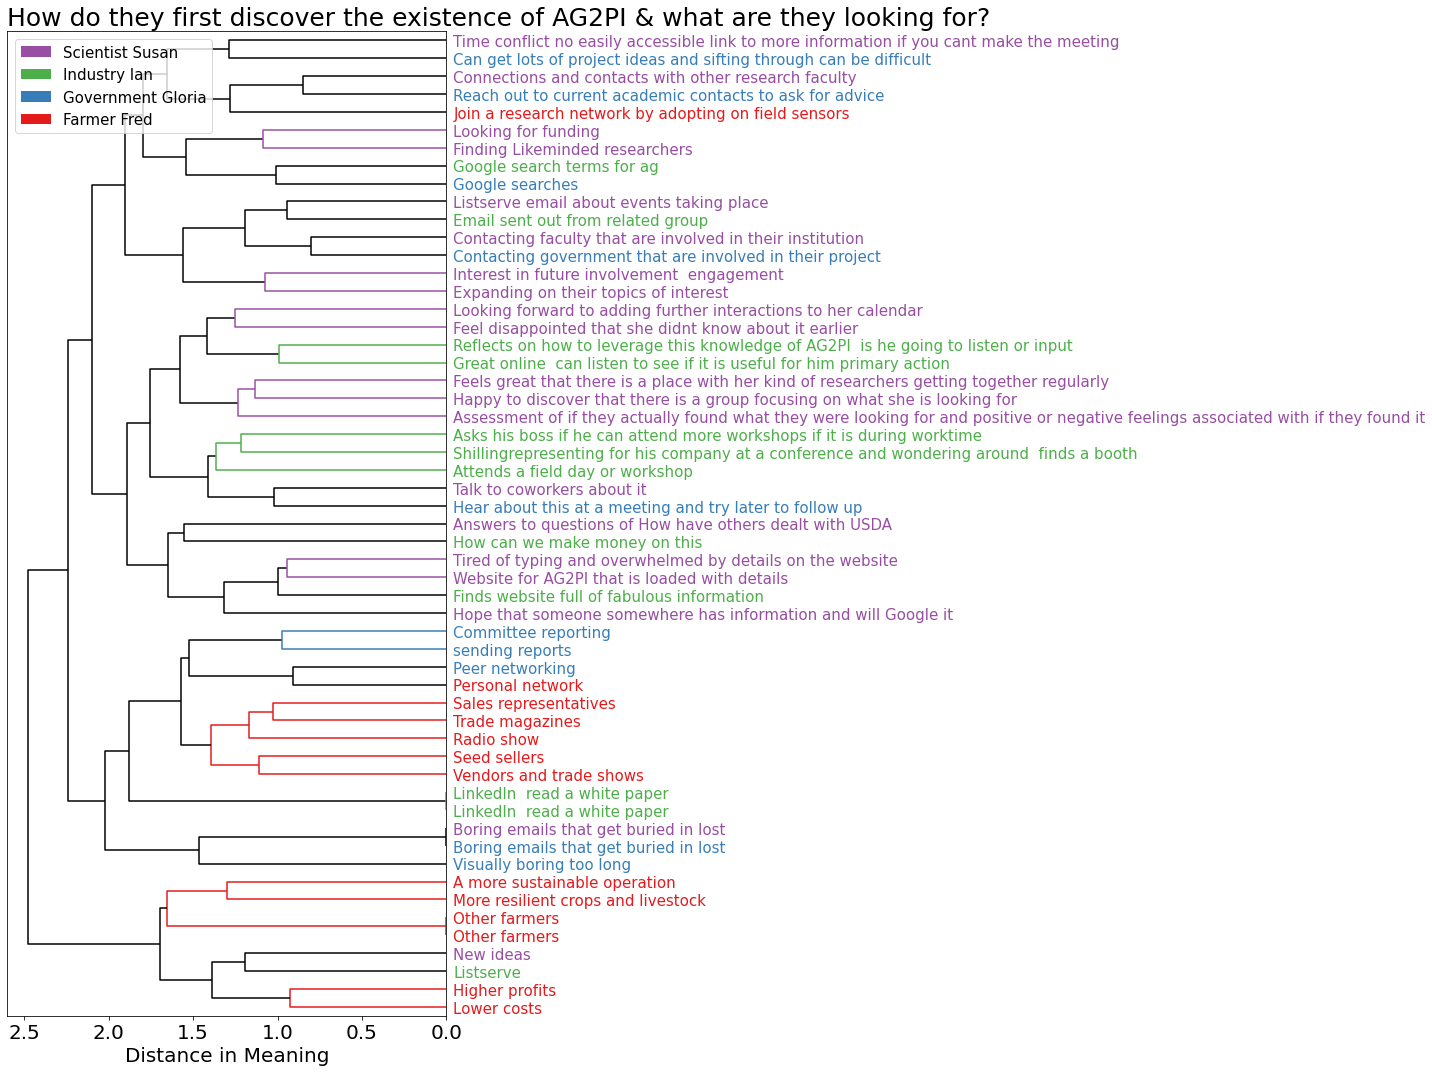

In [43]:
plt.figure(figsize=(20, 15))
ax = clusterSentEmbeddings(["Touchpoint", "Persona"], "workingDoc", getSentSimList, "How do they first discover the existence of AG2PI & what are they looking for?")
#D = dendrogram(Z=linked, labels=labelList, orientation="left",color_threshold=None, link_color_func=lambda x: link_cols[x])
ax.tick_params("y", labelsize=15)
ax.tick_params("x", labelsize=20)
#ax.tick_params(axis='both', which='major', labelsize=20)
#plt.rcParams["xtick.labelsize"] = 30
#plt.rcParams["ytick.labelsize"] = 20
ax.set_xlabel("Distance in Meaning", size=20)
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["axes.titlesize"] = 25
#ax.rc('legend',fontsize=15)
#ax.rc("axes", titlesize=25)
#ax.rc("")
ax.set_title("How do they first discover the existence of AG2PI & what are they looking for?", loc="left")
plt.tight_layout()
plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/googleSimDiscover.jpg")

In [18]:


"""
#try a different approach
nlp = spacy.load('en_use_md')

#we should seperate by the question, because that will give a more natural grouping of the words we care about
doc = Document("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/AG2PISlides.csv", nlp, subsetColumns=["Touchpoint", "Persona"])

doc.getColSubAttributeDict("Touchpoint", "workingDoc").keys()

#subset a single dictionary, this one is a particular question in the touchpoint column 
discoverDict = doc.getColSubAttributeDict("Touchpoint", "workingDoc")['How do they stay in contact with AG2PI ']
spanList = getSpans(discoverDict)
sims = getSimList(spanList)

sim = np.array(sims)
linked = linkage(sim, 'complete')

#create a list of all strings that we will be using, this is needed when creating color dictionary 
inList = {str(k):True for k in spanList}

#NOW take care of COLORING
personaDict = doc.getColSubAttributeDict("Persona", "workingDoc")

#TODO: Make this work better 
colorListFull = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#ffff33", "#a65628", "#f781bf", "#999999"]
colorListFull = [item.upper() for item in colorListFull]

#colorList = [str(item) for item in sns.husl_palette(len(personaDict.keys()))]
colorList = colorListFull[:len(personaDict.keys())]

#should be accessing all of the same data, but split up by persona 
#now we can create a color dictionary for the spans 
colorDict = {}

#do it this way so that we can sort keys later if we need to make the colors work 
keys = list(personaDict.keys())

#create a dictionary where statements under each persona are given the same color 
#create legend now so the ordering of colors and labels is right 
legendElements = []
for index, key in enumerate(keys): 
    currColor = colorList[index]
    legendElements.insert(0, Patch(facecolor=currColor,label=key))
    keySpans = getSpans(personaDict[key])
    for span in keySpans: 
        #only care about this span if it is one we are going to plot 
        toAdd = str(span)
        if toAdd in inLabels: 
            spacedLabel = toAdd
            while spacedLabel in colorDict: 
                spacedLabel = " " + spacedLabel
            #the span is a spaCy span object, we just need string contents 
            colorDict[spacedLabel] = currColor

#add spacing to the labels just like we added them to the colors 
labelDict = {}
labelList = []
for label in inList: 
    spacedLabel = label
    while spacedLabel in labelDict:
        spacedLabel = " " + spacedLabel
    labelDict[spacedLabel] = True
    labelList.append(spacedLabel)
            

#black
defaultColor = "#000000"

#dictionary of colors where each key is an index and the values are the colors for that link 
#a link is the reverse U shape that merges two subtrees together 
link_cols = {}

#go through only the first two columns of the linkage matrix (which contain linkage information)
#enumerate gives both an index (i) and the object in our data source (a 2d row of linkage)
for i, i12 in enumerate(linked[:,:2].astype(int)):
    
    #for x in i12 iterates through nodes linked in this cluster
    #gets the color of either the nodes (if leaves) or subtrees (if not leaves i.e. x > len(Z)) being linked
    c1, c2 = (link_cols[x] if x > len(linked) else colorDict[labelList[x]] for x in i12) 
        
    #if the colors are the same, then make merged tree of c1 and c2 (located at i + 1 + len(Z)) have same color 
    #as the subtrees. IF NOT, simply use default color 
    link_cols[i+1+len(linked)] = c1 if (c1 == c2 or i12[0] < len(linked) or i12[1] < len(linked)) else defaultColor

#the link function is basically saying, what should I color the upside-down U part of the tree that 
#links two subtrees 

# Dendrogram
plt.figure(figsize=(20, 13))
D = dendrogram(Z=linked, labels=labelList, orientation="left", color_threshold=None, link_color_func=lambda x: link_cols[x])
plt.tick_params("y", labelsize=15)
plt.tick_params("x", labelsize=15)
plt.legend(handles=legendElements,loc='upper left')
plt.tight_layout()

"""

/home/blitt/.local/lib/python3.8/site-packages/spacy/util.py:837: UserWarning: [W095] Model 'en_use_md' (0.4.3) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


NameError: name 'inLabels' is not defined

In [154]:
# len(colorDict)
# len(spanList)
# len(labelList)

44

In [135]:
# import seaborn as sns
# from matplotlib.patches import Patch

# personaDict = doc.getColSubAttributeDict("Persona", "workingDoc")

# colorListFull = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#ffff33", "#a65628", "#f781bf", "#999999"]
# colorListFull = [item.upper() for item in colorListFull]

# #colorList = [str(item) for item in sns.husl_palette(len(personaDict.keys()))]
# colorList = colorListFull[:len(personaDict.keys())]

# #should be accessing all of the same data, but split up by persona 
# #now we can create a color dictionary for the spans 
# colorDict = {}

# #do it this way so that we can sort keys later if we need to make the colors work 
# keys = list(personaDict.keys())

# #create a dictionary where statements under each persona are given the same color 
# legendElements = []
# for index, key in enumerate(keys): 
#     currColor = colorList[index]
#     legendElements.insert(0, Patch(facecolor=currColor,label=key))
#     keySpans = getSpans(personaDict[key])
#     for span in keySpans: 
#         #the span is a spaCy span object, we just need string contents 
#         colorDict[str(span)] = currColor


In [91]:
#figuring out how to color subtrees at all...

#black
defaultColor = "#000000"

link_cols = {}



#go through only the first two columns of the linkage matrix (which contain linkage information)
#enumerate gives both an index (i) and the object in our data source (a 2d row of linkage)
for i, i12 in enumerate(linked[:,:2].astype(int)):
    
    #for x in i12 iterates through nodes linked in this cluster
    #gets the color of either the nodes (if leaves) or subtrees (if not leaves i.e. x > len(Z)) being linked
    c1, c2 = (link_cols[x] if x > len(linked) else colorDict[labelList[x]] for x in i12) 
        
    #if the colors are the same, then make merged tree of c1 and c2 (located at i + 1 + len(Z)) have same color 
    #as the subtrees. IF NOT, simply use default color 
    link_cols[i+1+len(linked)] = c1 if (c1 == c2 or i12[0] < len(linked) or i12[1] < len(linked)) else defaultColor

#the link function is basically saying, what should I color the upside-down U part of the tree that 
#links two subtrees 


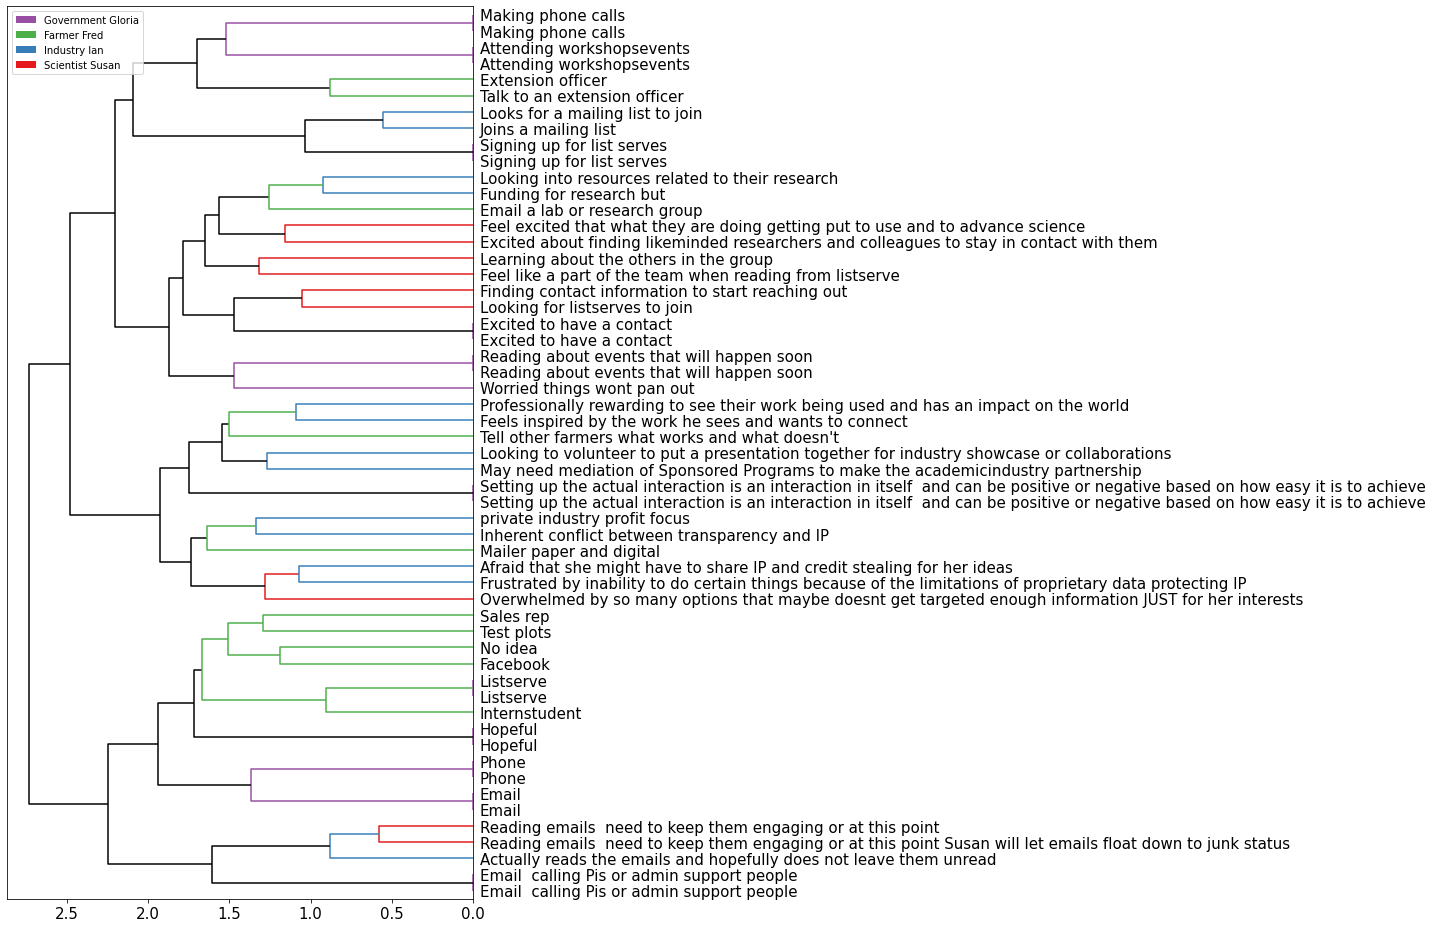

In [86]:
# Dendrogram
# plt.figure(figsize=(20, 13))
# D = dendrogram(Z=linked, labels=labelList, orientation="left", color_threshold=None, link_color_func=lambda x: link_cols[x])
# plt.tick_params("y", labelsize=15)
# plt.tick_params("x", labelsize=15)
# plt.legend(handles=legendElements,loc='upper left')
# plt.tight_layout()


In [111]:
df = doc.dataFrame
[item for item in df["value"] if "Reading" in item]

['Reading emails – need to keep them engaging or at this point Susan will let emails float down to junk status',
 'Reading emails – need to keep them engaging or at this point ',
 'Reading about events that will happen soon ',
 'Reading about events that will happen soon ']

In [110]:
#do a manual check to make sure this is working
list(df.loc[(df["Touchpoint"] == "How do they stay in contact with AG2PI ") & (df["Persona"] == "Scientist Susan"), "value"])

['Signing up for list serves',
 'Email / calling Pis or admin support people',
 'Setting up the actual interaction is an interaction in itself – and can be positive or negative based on how easy it is to achieve',
 'Attending workshops/events',
 'Making phone calls',
 'Reading emails – need to keep them engaging or at this point Susan will let emails float down to junk status',
 'Feel like a part of the team when reading from listserve',
 'Learning about the others in the group',
 'Looking for listserves to join',
 'Looking into resources related to their research',
 'Finding contact information to start reaching out',
 'Email',
 'Phone',
 'Listserve',
 'Reading about events that will happen soon ',
 'Excited to have a contact',
 'Hopeful',
 'Worried things won’t pan out',
 'Afraid that she might have to share IP and credit stealing for her ideas? ',
 'Excited about finding likeminded researchers and colleagues to stay in contact with them',
 'Overwhelmed by so many options that maybe 

In [8]:
#an attempt at writing the code using the new way of splitting when creating the document object 
import importlib
imported_module = importlib.import_module("DocumentWorking")
importlib.reload(imported_module)
from DocumentWorking import *

doc = Document("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/AG2PISlides.csv",nlp,subsetColumns=["Persona", "Touchpoint", ["Touchpoint", "Persona"]])

In [20]:
"""
Subset list is one of the lists from subsetColumns given when initializing the Document object. 
It specifies first what information we will be taking a slice of to create the tree, and 
what information will be used to color the tree. 

cleaningLevel is the level of information that we want to take. Right now we should always use "workingDoc",
since we need actual spaCy documents to get spans and calculate span similarity. 

Key is the "slice" to take. 


For example, we could have: 
key = 'How do they first discover the existence of AG2PI & what are they looking for?'
clusterSentEmbeddings(["Touchpoint", "Persona"], "workingDoc", key) 

which would take answers to the question "How do they first discover the existence of AG2PI & what are they looking for"
colored by Persona, using text from the workingDoc text created during the automatic cleaning of the data
that occurs when creating Document. 
"""

def clusterSentEmbeddings(subsetList, cleaningLevel, inKey, ax=None): 
    #example 
    #personaDict = doc.getDoubleColSubAttributeDict(["Touchpoint", "Persona"], "workingDoc")
    #inKey = 'How do they first discover the existence of AG2PI & what are they looking for?'
    
    personaDict = doc.getDoubleColSubAttributeDict(["Touchpoint", "Persona"], "workingDoc")
    
    """
    recreate the nested dictionary but get the spans instead of having the working doc
    this dictionary has touchpoints as the outer key and personas as the inner, so we can easily split by persona 
    for a particular toucpoint 
    """
    spanDict = {}
    for outerKey in personaDict.keys():
        spanDict[outerKey] = {}
        for innerKey in personaDict[outerKey].keys(): 
            spanDict[outerKey][innerKey] = getSpans(personaDict[outerKey][innerKey]) 

    #we most likely also only want to get dictionaries for one value of the touchpoint 
    keyDictSpans = spanDict[inKey]

    #now add spaces so there are technically no double spans in keyDict
    #use temporary dictionary to hold items while changing them 
    inSpans = {}

    #need to do deepcopy here
    keyDict = {}

    for key in keyDictSpans.keys(): 
        keyDict[key] = [None for item in range(0, len(keyDictSpans[key]))]
        for index, span in enumerate(keyDictSpans[key]): 
            spaceSpan = str(span)

            #add as many spaces to this span as needed so that there are no doubles, tripes
            #etc.. in our span list when we go to create plot/assign colors 
            while spaceSpan in inSpans: 
                spaceSpan += " "

            inSpans[spaceSpan] = True 

            #replace non-spaced version of span with space span 
            keyDict[key][index] = spaceSpan

    #get colors, map to keys in dictionary created above
    colorListFull = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#ffff33", "#a65628", "#f781bf", "#999999"]
    colorListFull = [item.upper() for item in colorListFull]
    colorKeyMapping = dict(zip(sorted(list(keyDict.keys())), colorListFull[:len(keyDict.keys())]))

    #make sure legend order matches with colors
    legendElements = []
    for index, key in enumerate(sorted(list(keyDict.keys()))):
        currColor = colorListFull[index]
        legendElements.insert(0, Patch(facecolor=currColor,label=key))

    #map each span to the color associated with its key in keyDict
    #this way we can easily grab the color for any span when plotting 
    colorSpanMapping = {
        str(span):colorKeyMapping[key]
        for key, val in keyDict.items()
        for span in val}

    #NOTE: we should be ok matching the spans to the strings because we sort the keys when we iterate 
    #and we maintain the order of items in the lists within keyDictSpans 
    #create list of all spans 
    spanList = []
    for k in sorted(list(keyDictSpans.keys())): 
        spanList += keyDictSpans[k]

    #create list of all string versions of spans (with spaces )
    labelList = []
    for k in sorted(list(keyDict.keys())): 
        labelList += keyDict[k]

    """
    #TODO: this doesn't seem to be working at the moment 
    #get similarities between spans in this list 
    #add a small number (.05) to items that are identical so we can see their color 
    simList = getSimList(spanList)
    for i in range(0, len(simList)): 
        for j in range(0, len(simList[i])): 
            if simList[i][j] < .2: 
                simList[i][j] = .1
                #print(simList[i][j])
             """  
    simList = getSimList(spanList)
    simList = np.array(simList)

    #get linkage 
    linked = linkage(simList, "ward")

    #COLORING 
    #black
    defaultColor = "#000000" 

    link_cols = {}

    #go through only the first two columns of the linkage matrix (which contain linkage information)
    #enumerate gives both an index (i) and the object in our data source (a 2d row of linkage)
    for i, i12 in enumerate(linked[:,:2].astype(int)):

        #for x in i12 iterates through nodes linked in this cluster
        #gets the color of either the nodes (if leaves) or subtrees (if not leaves i.e. x > len(Z)) being linked
        c1, c2 = (link_cols[x] if x > len(linked) else colorSpanMapping[labelList[x]] for x in i12) 

        #if the colors are the same, then make merged tree of c1 and c2 (located at i + 1 + len(Z)) have same color 
        #as the subtrees. IF NOT, simply use default color 
        link_cols[i+1+len(linked)] = c1 if (c1 == c2 or i12[0] < len(linked) or i12[1] < len(linked)) else defaultColor

    #the link function is basically saying, what should I color the upside-down U part of the tree that 
    #links two subtrees 
    
    
    if ax is None: 
        ax = plt.gca()
    D = dendrogram(Z=linked, labels=labelList, orientation="left",color_threshold=None, link_color_func=lambda x: link_cols[x])
    ax.legend(handles=legendElements,loc='upper left')
    #ax.set_title(inKey)
    print(inKey)
    return ax

<ipython-input-3-e33ddf64d98a>:25: UserWarning: [W008] Evaluating Span.similarity based on empty vectors.
  currSims.append(span1.similarity(span2))


How do they first discover the existence of AG2PI & what are they looking for?


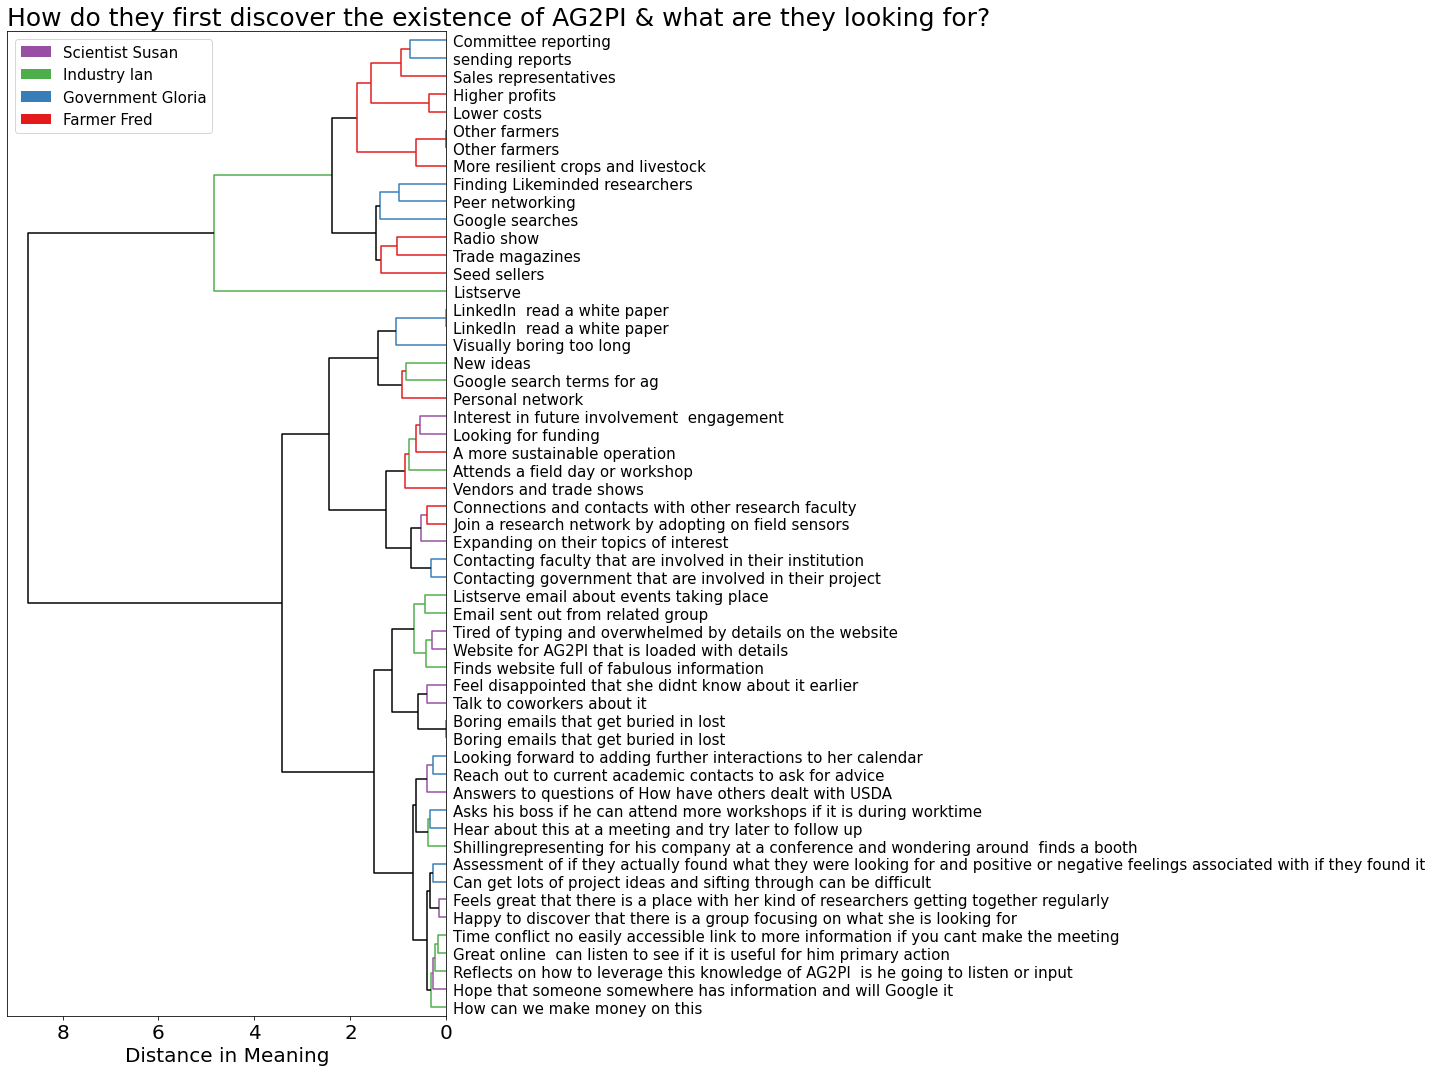

In [21]:
# Dendrogram
#plt.figure(figsize=(20, 13))
#plt.legend(handles=legendElements,loc='upper left')

plt.figure(figsize=(20, 15))
ax = clusterSentEmbeddings(["Touchpoint", "Persona"], "workingDoc", 'How do they first discover the existence of AG2PI & what are they looking for?')
#D = dendrogram(Z=linked, labels=labelList, orientation="left",color_threshold=None, link_color_func=lambda x: link_cols[x])
ax.tick_params("y", labelsize=15)
ax.tick_params("x", labelsize=20)
#ax.tick_params(axis='both', which='major', labelsize=20)
#plt.rcParams["xtick.labelsize"] = 30
#plt.rcParams["ytick.labelsize"] = 20
ax.set_xlabel("Distance in Meaning", size=20)
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["axes.titlesize"] = 25
#ax.rc('legend',fontsize=15)
#ax.rc("axes", titlesize=25)
#ax.rc("")
ax.set_title('How do they first discover the existence of AG2PI & what are they looking for?', loc="left")
plt.tight_layout()
plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/sentEmbeddingSimilarity.jpg")

In [22]:
spanDict.keys()

NameError: name 'spanDict' is not defined

In [80]:
#an attempt at writing the code using the new way of splitting when creating the document object 
import importlib
imported_module = importlib.import_module("DocumentWorking")
importlib.reload(imported_module)
from DocumentWorking import *

doc = Document("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/AG2PISlides.csv",nlp,subsetColumns=["Persona", "Touchpoint", ["Touchpoint", "Persona"]])

def afPropSentEmbeddings(subsetList, cleaningLevel, inKey, ax=None): 
    #example 
    #personaDict = doc.getDoubleColSubAttributeDict(["Touchpoint", "Persona"], "workingDoc")
    #inKey = 'How do they first discover the existence of AG2PI & what are they looking for?'
    
    personaDict = doc.getDoubleColSubAttributeDict(["Touchpoint", "Persona"], "workingDoc")
    
    """
    recreate the nested dictionary but get the spans instead of having the working doc
    this dictionary has touchpoints as the outer key and personas as the inner, so we can easily split by persona 
    for a particular toucpoint 
    """
    spanDict = {}
    for outerKey in personaDict.keys():
        spanDict[outerKey] = {}
        for innerKey in personaDict[outerKey].keys(): 
            spanDict[outerKey][innerKey] = getSpans(personaDict[outerKey][innerKey]) 

    #we most likely also only want to get dictionaries for one value of the touchpoint 
    keyDictSpans = spanDict[inKey]

    #now add spaces so there are technically no double spans in keyDict
    #use temporary dictionary to hold items while changing them 
    inSpans = {}

    #need to do deepcopy here
    keyDict = {}

    for key in keyDictSpans.keys(): 
        keyDict[key] = [None for item in range(0, len(keyDictSpans[key]))]
        for index, span in enumerate(keyDictSpans[key]): 
            spaceSpan = str(span)

            #add as many spaces to this span as needed so that there are no doubles, tripes
            #etc.. in our span list when we go to create plot/assign colors 
            while spaceSpan in inSpans: 
                spaceSpan += " "

            inSpans[spaceSpan] = True 

            #replace non-spaced version of span with space span 
            keyDict[key][index] = spaceSpan

    #get colors, map to keys in dictionary created above
    colorListFull = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#ffff33", "#a65628", "#f781bf", "#999999"]
    colorListFull = [item.upper() for item in colorListFull]
    colorKeyMapping = dict(zip(sorted(list(keyDict.keys())), colorListFull[:len(keyDict.keys())]))

    #make sure legend order matches with colors
    legendElements = []
    for index, key in enumerate(sorted(list(keyDict.keys()))):
        currColor = colorListFull[index]
        legendElements.insert(0, Patch(facecolor=currColor,label=key))

    #map each span to the color associated with its key in keyDict
    #this way we can easily grab the color for any span when plotting 
    colorSpanMapping = {
        str(span):colorKeyMapping[key]
        for key, val in keyDict.items()
        for span in val}

    #NOTE: we should be ok matching the spans to the strings because we sort the keys when we iterate 
    #and we maintain the order of items in the lists within keyDictSpans 
    #create list of all spans 
    spanList = []
    for k in sorted(list(keyDictSpans.keys())): 
        spanList += keyDictSpans[k]

    #create list of all string versions of spans (with spaces )
    labelList = []
    for k in sorted(list(keyDict.keys())): 
        labelList += keyDict[k]

    """
    #TODO: this doesn't seem to be working at the moment 
    #get similarities between spans in this list 
    #add a small number (.05) to items that are identical so we can see their color 
    simList = getSimList(spanList)
    for i in range(0, len(simList)): 
        for j in range(0, len(simList[i])): 
            if simList[i][j] < .2: 
                simList[i][j] = .1
                #print(simList[i][j])
             """  
    simList = getSimList(spanList)
    simList = np.array(simList)
    return simList, labelList 

In [30]:
sims, sentances = afPropSentEmbeddings(["Touchpoint", "Persona"], "workingDoc", 'How do they first discover the existence of AG2PI & what are they looking for?')

<ipython-input-3-e33ddf64d98a>:25: UserWarning: [W008] Evaluating Span.similarity based on empty vectors.
  currSims.append(span1.similarity(span2))


In [31]:
dissim = np.array([[1-item for item in inner] for inner in sims])
dissim

array([[0.        , 0.48224193, 0.21493775, ..., 0.42017615, 0.47929037,
        0.5293341 ],
       [0.48224193, 0.        , 0.47060728, ..., 0.38976419, 0.4829579 ,
        0.49456269],
       [0.21493775, 0.47060728, 0.        , ..., 0.44280118, 0.4519434 ,
        0.568932  ],
       ...,
       [0.42017615, 0.38976419, 0.44280118, ..., 0.        , 0.26344764,
        0.17065632],
       [0.47929037, 0.4829579 , 0.4519434 , ..., 0.26344764, 0.        ,
        0.38308859],
       [0.5293341 , 0.49456269, 0.568932  , ..., 0.17065632, 0.38308859,
        0.        ]])

In [47]:
"""
def transform(inList): 
    return [np.log(item) - np.log(1-item) for item in inList if item != 0 and item != 1]

flatSims = np.array([item for inner in simList for item in inner])
plt.hist(transform(flatSims))
"""

def transform(inNested): 
    partial = np.array([[(np.log(item) - np.log(1-item)) for item in inner] for inner in inNested])
    return [max(partial) - item for item in partial]

#our inArr should already be scaled between 0 and 1, so just take 1-value for all values 
def toDissim(inArr): 
    return [[1-item for item in inner] for inner in inArr]

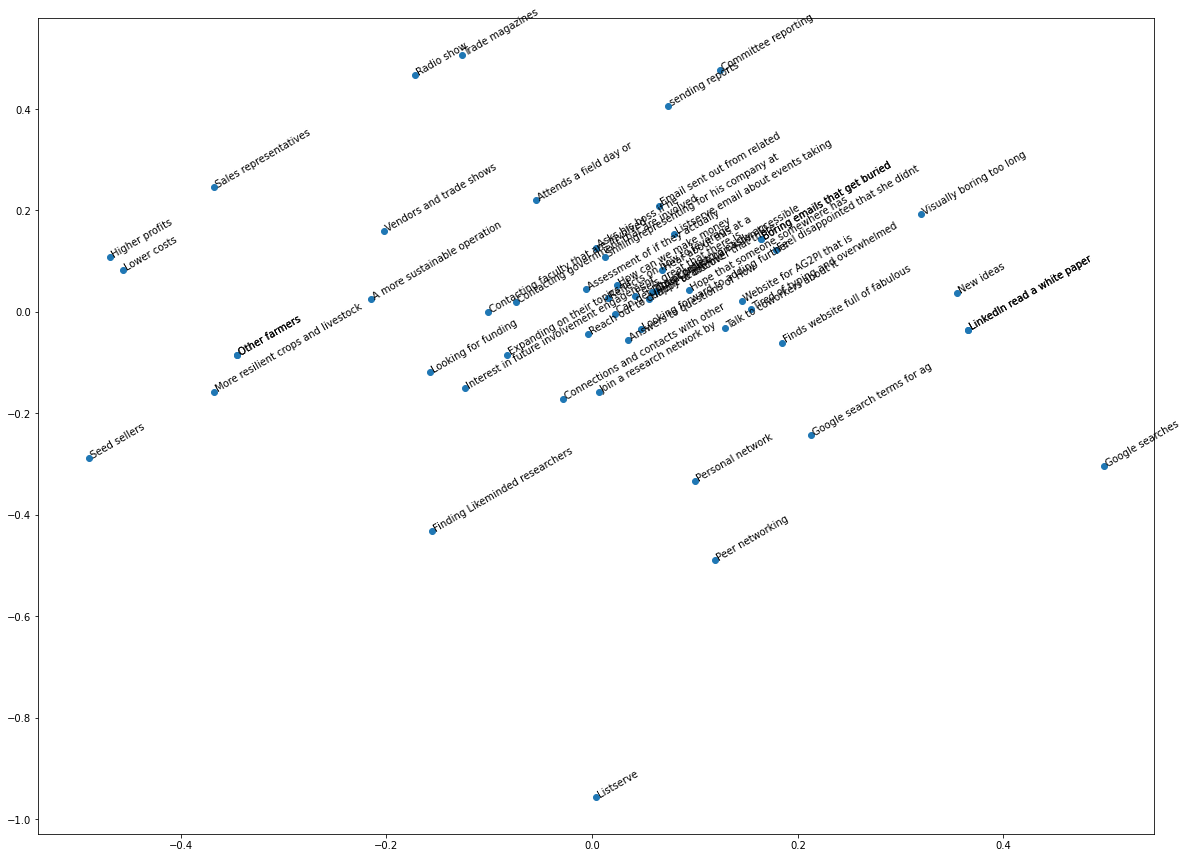

In [48]:
from sklearn.manifold import MDS 
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=3)
fitted = mds.fit_transform(dissim)
fig = plt.figure(figsize=(20, 15))

firstFew = [" ".join(item.split()[:5]) for item in sentances]
ax = fig.gca()

X = fitted[:,0]
Y = fitted[:,1]

ax.scatter(X, Y)

for index, lab in enumerate(firstFew): 
    ax.text(X[index], Y[index], s=lab, rotation=30)

In [49]:
#use silhouette score to evaluate cluster "performance"
#remember this is subjective since there is no ground truth, need to think 
#carefully about the evaluation method 
from sklearn.metrics import silhouette_score
from sklearn.cluster import AffinityPropagation 
labels = AffinityPropagation(affinity="precomputed", preference = .6, random_state = 8).fit_predict(sims)

sil = silhouette_score(dissim,labels, metric="precomputed")
sil

0.255506295519151

array(['How do they first discover the existence of AG2PI & what are they looking for?',
       'How do they stay in contact with AG2PI ',
       'How do they get information from AG2PI & learn of new activities or opportunities ',
       'How can they share their expertise with AG2PI ',
       'What is defined as a successful interaction ',
       'How can they share information with/to AG2PI '], dtype=object)

<ipython-input-3-e33ddf64d98a>:25: UserWarning: [W008] Evaluating Span.similarity based on empty vectors.
  currSims.append(span1.similarity(span2))
<ipython-input-3-e33ddf64d98a>:25: UserWarning: [W008] Evaluating Span.similarity based on empty vectors.
  currSims.append(span1.similarity(span2))
/home/blitt/.local/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:250: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn(
/home/blitt/.local/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:250: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn(
/home/blitt/.local/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:250: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn(
/home/blitt/.local/lib/python3.8/site-packages/sklearn/cl

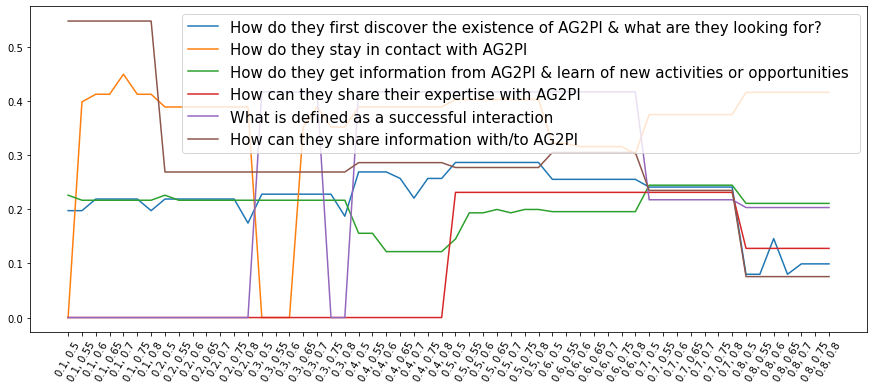

In [107]:
#try some cluster evaluation 
clustNum = []
silList = []
preferenceList = []
dampingList = []
touchpointList = []

#all possible values of touchpoint 
touchpointVals = doc.dataFrame["Touchpoint"].unique()

for touchpointVal in touchpointVals:
    sims, sentances = afPropSentEmbeddings(["Touchpoint", "Persona"], "workingDoc", touchpointVal)
    
    for i in np.arange(.1, .9, .1): 
        for j in np.arange(.5, .8, .05): 
            touchpointList.append(touchpointVal)
            preferenceList.append(i)
            dampingList.append(j)
    
            #now try and mess around with affinity prop a bit as well 
            from sklearn.cluster import AffinityPropagation 
            labels = AffinityPropagation(affinity="precomputed", preference = i, damping = j, random_state = 8).fit_predict(sims)
            
            if len(set(labels)) > 1:
                

                #create dataframe of output for easier analysis 
                clustDf = pd.DataFrame({"clusterLabel":labels, "sentance":sentances})
                clustDf.sort_values("clusterLabel")
                #print(i)
                #print(str(len(clustDf["clusterLabel"].unique())) + " clusters currently being used")
                clustNum.append(len(clustDf["clusterLabel"].unique()))

                dissim = toDissim(sims)
                sil = silhouette_score(dissim,labels, metric="precomputed")
                silList.append(sil)
                #print(sil)
                #print("------------------------------------------------")
            else: 
                
                silList.append(0)
                clustNum.append(0)
                

df = pd.DataFrame({"touchpoint":touchpointList, "preference":preferenceList, "damping":dampingList, "clustNum":clustNum, "silhouetteScore":silList})

fig = plt.figure(figsize=(15, 6))
ax = plt.gca()

#for touchpoint in df[].unique(): 
for touchpointVal in touchpointVals: 
    currDf = df[df["touchpoint"] == touchpointVal]
    ax.plot([str(i) for i in range(0, len(currDf))], currDf["silhouetteScore"], label=touchpointVal)
    #ax.set_xticklabels(currDf["silhouetteScore"], rotation = 60)

#use the last currDf to grab the plot labels 
plotLabs = [str(round(preferenceList[i], 3)) + ", " + str(round(dampingList[i], 3)) for i in range(0, len(currDf))]
ax.set_xticklabels(plotLabs, rotation = 60)
plt.legend()
plt.show()



In [118]:
#try applying these values and seeing if they work... 
touchpointVal = "How can they share their expertise with AG2PI "
sims, sentances = afPropSentEmbeddings(["Touchpoint", "Persona"], "workingDoc", touchpointVal)
labels = AffinityPropagation(affinity="precomputed", preference = .6, damping = .6, random_state = 8).fit_predict(sims)

#create dataframe of output for easier analysis 
clustDf = pd.DataFrame({"clusterLabel":labels, "sentance":sentances})
clustDf.sort_values("clusterLabel")

,clusterLabel,sentance
0,0,Responding to or sharing information via email...
3,0,Signing up for listserve emails
5,0,Finding contact information
1,1,Sharing during activitiesmeetings
2,1,Talking with leaderscolleagues
4,1,Researching interests of AG2PI
6,1,Excited to have contributed people with shared...
7,1,Disappointed at lack of opportunity to share


In [432]:
#now try and mess around with affinity prop a bit as well 
from sklearn.cluster import AffinityPropagation 
labels = AffinityPropagation(affinity="precomputed", preference = .6, random_state = 8).fit_predict(sims)

#create dataframe of output for easier analysis 
clustDf = pd.DataFrame({"clusterLabel":labels, "sentance":sentances})
clustDf.sort_values("clusterLabel")


,clusterLabel,sentance
0,0,Lower costs
2,0,Higher profits
5,1,Trade magazines
6,2,Seed sellers
1,3,More resilient crops and livestock
7,3,Other farmers
10,3,Other farmers
8,4,Radio show
36,5,Contacting faculty that are involved in their ...
45,5,Looking for funding


In [ ]:
#TODO: consider similarities other than cosine similarity for vectors 
#TODO: current idea, label training data set with positiive or negative, and then fit logistic regression 
#TODO: try to use sentiment predictions from the raw hugging face library 
#TODO: try to work with only nouns and do comparison of sentances 

In [ ]:
#create 